In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [64]:
housing_price_df = pd.read_csv('housing_price_dataset.csv')
housing_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [65]:
housing_price_df.shape

(50000, 6)

In [66]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [67]:
missing_column = housing_price_df.isnull().sum()
missing_column = missing_column[missing_column > 0]
missing_column

Series([], dtype: int64)

In [68]:
housing_price_df[housing_price_df.duplicated()]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [69]:
housing_price_df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [70]:
housing_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [71]:
housing_price_df[housing_price_df['Price'] <= 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


In [72]:
housing_price_df = housing_price_df[housing_price_df['Price'] >= 0]
housing_price_df.shape

(49978, 6)

In [73]:
housing_price_df['Neighborhood'].value_counts()

Suburb    16716
Rural     16668
Urban     16594
Name: Neighborhood, dtype: int64

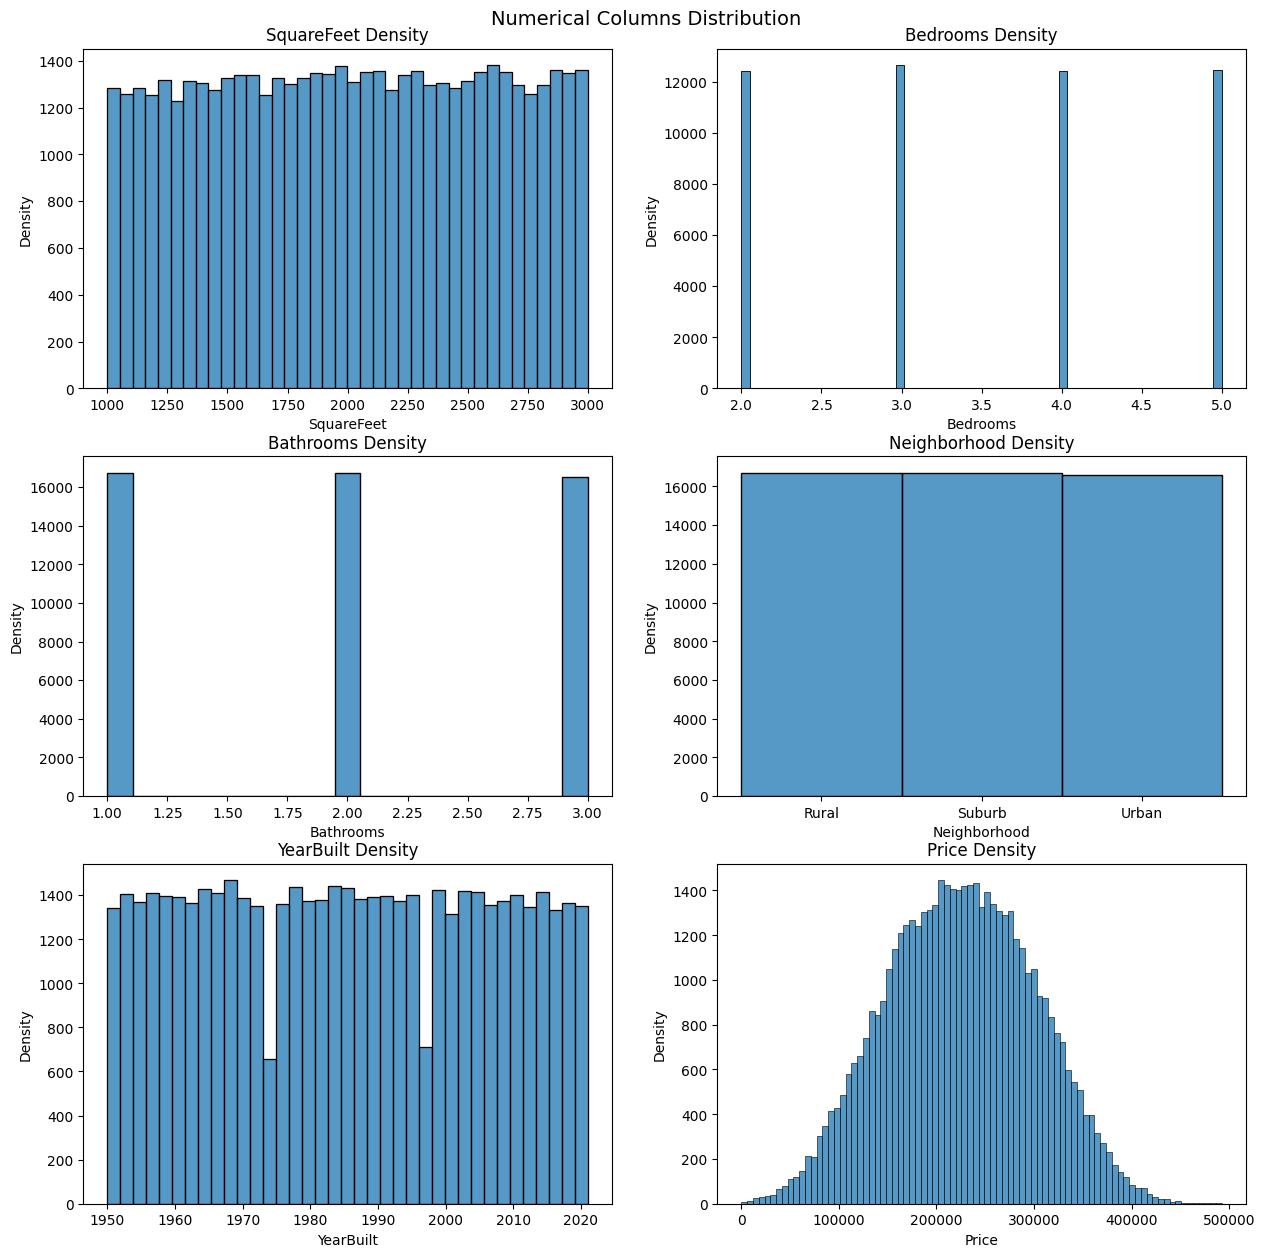

In [74]:
num_rows = len(housing_price_df.columns) // 2 + len(housing_price_df.columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

for i, col in enumerate(housing_price_df.columns.to_numpy()):
    r = i // 2
    c = i % 2
    sns.histplot(x=col, data=housing_price_df, ax=axes[r,c])
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col} Density")

if len(housing_price_df.columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5,0.9,"Numerical Columns Distribution",va="center", ha="center", fontsize=14)
plt.show()

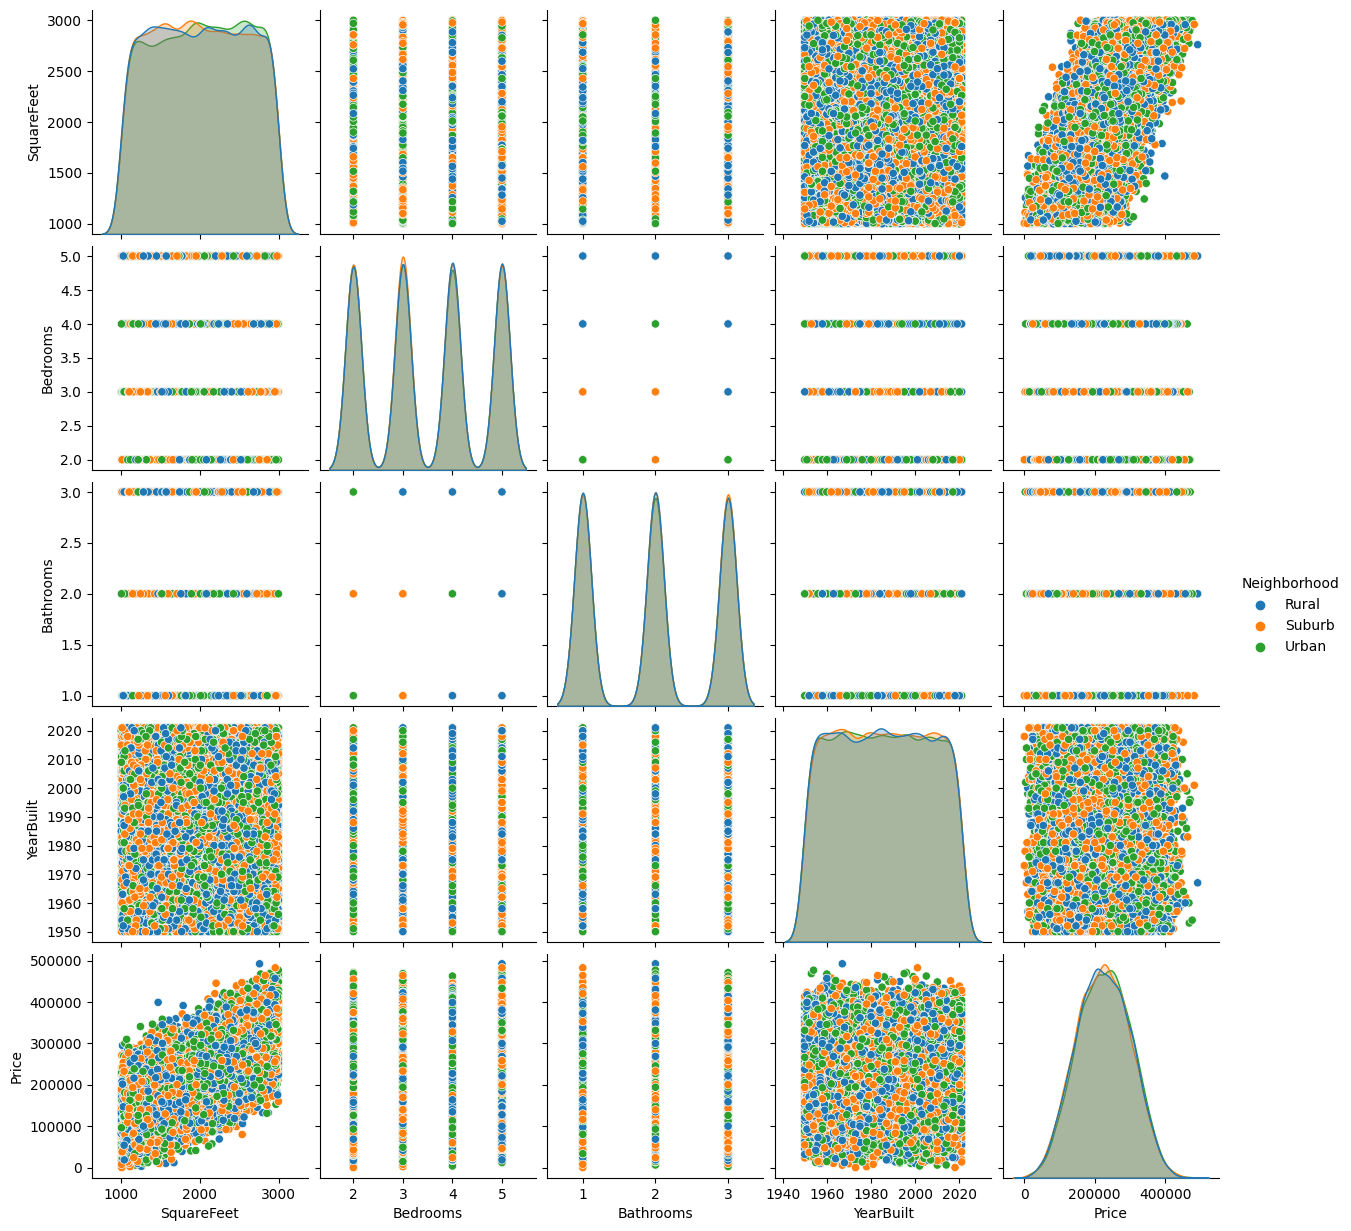

In [16]:
sns.pairplot(housing_price_df,
             vars=["SquareFeet","Bedrooms","Bathrooms","YearBuilt",'Price'],
            hue='Neighborhood')
plt.show()

In [75]:
housing_price_df = pd.get_dummies(housing_price_df)
housing_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0


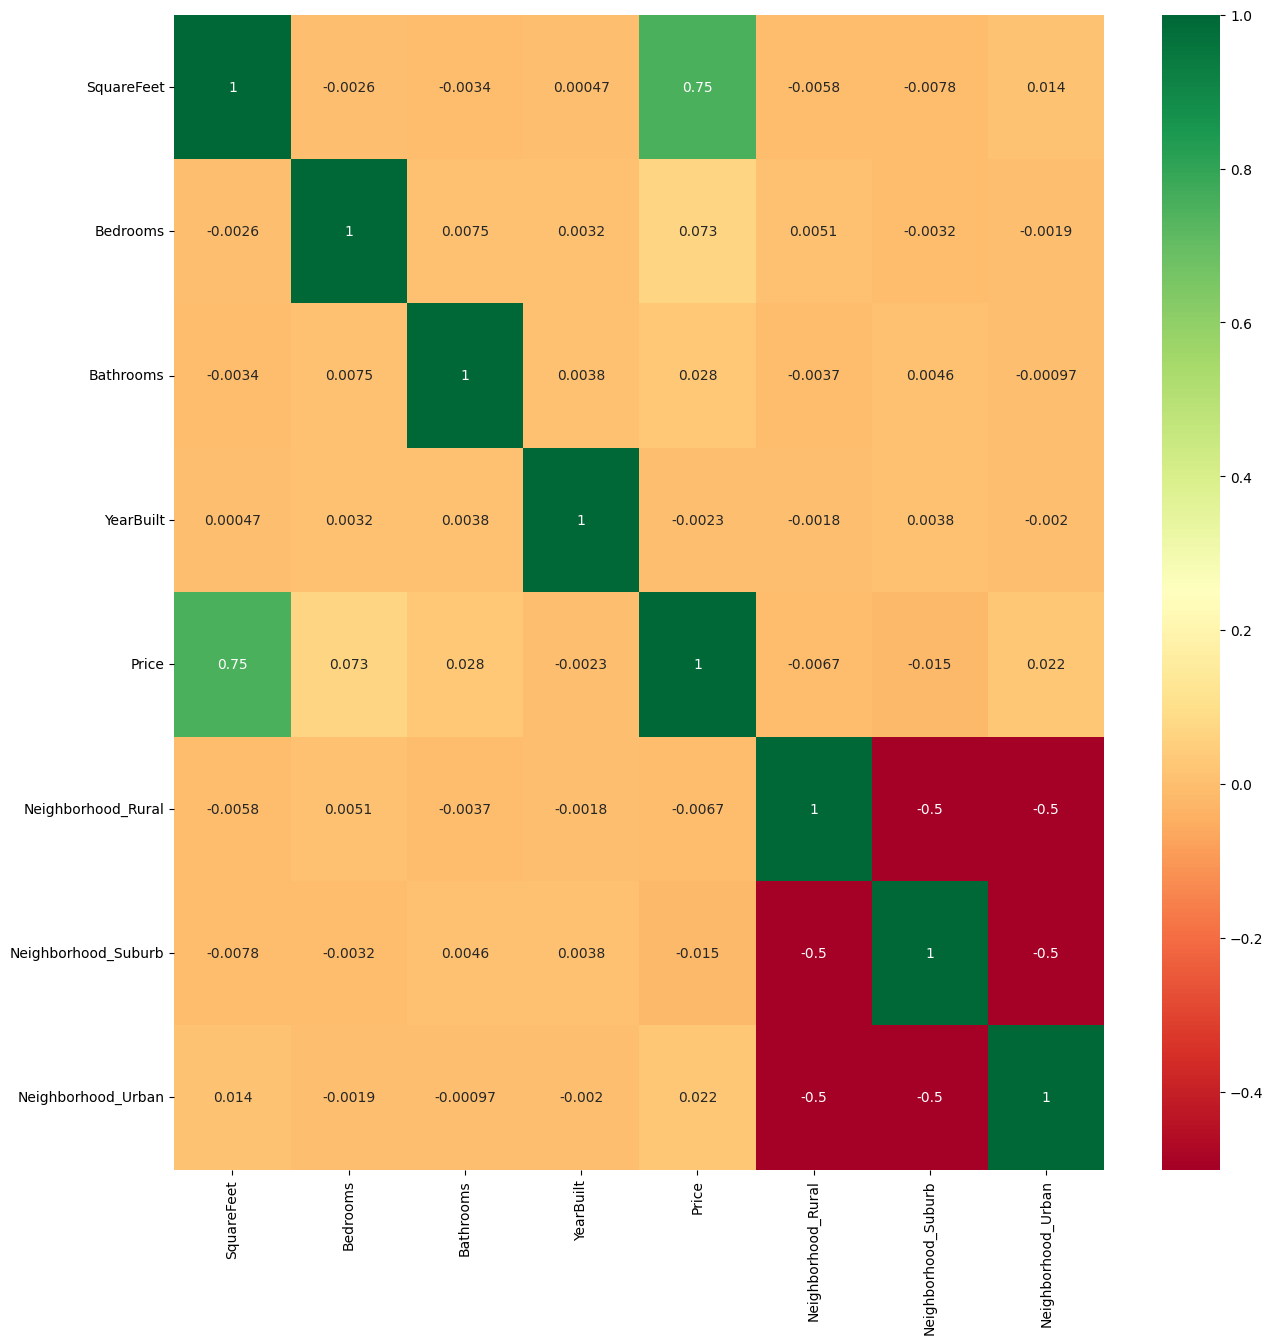

In [76]:
correlation_matrix = housing_price_df.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(15,15))
g = sns.heatmap(housing_price_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [77]:
y = housing_price_df['Price']
X = housing_price_df.drop(columns=['Price'])

#shuffle and extract an 80/20 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
#Print out the top few lines of each dataframe to check that the split was correct
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

       SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Rural  \
33588        2333         2          1       1976                   1   
23278        2331         4          2       1985                   0   
28926        2987         4          2       1974                   0   
24803        2146         3          2       2009                   0   
24860        1762         3          3       1969                   1   

       Neighborhood_Suburb  Neighborhood_Urban  
33588                    0                   0  
23278                    0                   1  
28926                    0                   1  
24803                    1                   0  
24860                    0                   0  
       SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Rural  \
38298        2768         5          3       2006                   1   
44892        2348         5          2       1985                   0   
34675        2872         5          3       195

In [79]:
print("LinearRegression")

results_regression={}

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse_lr = -cv_scores.mean()

RMSE_lr = sqrt(mean_squared_error(y_true=y_test, y_pred=y_lr_pred))

MAE_lr = mean_absolute_error(y_test, y_lr_pred)

r2score_lr = r2_score(y_test, y_lr_pred)

results_regression['LR'] = {'cv_rmse':cv_rmse_lr, 'rmse':RMSE_lr, 'mae':MAE_lr, 'r2_score':r2score_lr}
results_regression

LinearRegression


{'LR': {'cv_rmse': 2499768515.8716493,
  'rmse': 49500.53843849187,
  'mae': 39564.75219343786,
  'r2_score': 0.5771781576254589}}

In [80]:
print("Ridge")

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_rg_pred = ridge_model.predict(X_test)

cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse_rg = -cv_scores.mean()

RMSE_rg = sqrt(mean_squared_error(y_true=y_test, y_pred=y_rg_pred))

MAE_rg = mean_absolute_error(y_test, y_rg_pred)

r2score_rg = r2_score(y_test, y_rg_pred)

results_regression['RG'] = {'cv_rmse':cv_rmse_rg, 'rmse':RMSE_rg, 'mae':MAE_rg, 'r2_score':r2score_rg}
results_regression

Ridge


{'LR': {'cv_rmse': 2499768515.8716493,
  'rmse': 49500.53843849187,
  'mae': 39564.75219343786,
  'r2_score': 0.5771781576254589},
 'RG': {'cv_rmse': 2499768435.246228,
  'rmse': 49500.54062709803,
  'mae': 39564.75424454856,
  'r2_score': 0.57717812023635}}

In [81]:
print("Lasso")

lasso_model = Lasso(alpha=1.0)

lasso_model.fit(X_train, y_train)

y_ls_pred = lasso_model.predict(X_test)

cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse_ls = -cv_scores.mean()

RMSE_ls = sqrt(mean_squared_error(y_true=y_test, y_pred=y_ls_pred))

MAE_ls = mean_absolute_error(y_test, y_ls_pred)

r2score_ls = r2_score(y_test, y_ls_pred)

results_regression['LS'] = {'cv_rmse':cv_rmse_ls, 'rmse':RMSE_ls, 'mae':MAE_ls, 'r2_score':r2score_ls}
results_regression

Lasso


{'LR': {'cv_rmse': 2499768515.8716493,
  'rmse': 49500.53843849187,
  'mae': 39564.75219343786,
  'r2_score': 0.5771781576254589},
 'RG': {'cv_rmse': 2499768435.246228,
  'rmse': 49500.54062709803,
  'mae': 39564.75424454856,
  'r2_score': 0.57717812023635},
 'LS': {'cv_rmse': 2499766297.682065,
  'rmse': 49500.57703333354,
  'mae': 39564.79237198638,
  'r2_score': 0.5771774982892603}}

In [82]:
print("Decision Tree Regressor")

decisiontree_model = DecisionTreeRegressor()

decisiontree_model.fit(X_train, y_train)

y_dt_pred = decisiontree_model.predict(X_test)

cv_scores = cross_val_score(decisiontree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse_dt = -cv_scores.mean()

RMSE_dt = sqrt(mean_squared_error(y_true=y_test, y_pred=y_dt_pred))

MAE_dt = mean_absolute_error(y_test, y_dt_pred)

r2score_dt = r2_score(y_test, y_dt_pred)

results_regression['DT'] = {'cv_rmse':cv_rmse_dt, 'rmse':RMSE_dt, 'mae':MAE_dt, 'r2_score':r2score_dt}
results_regression

Decision Tree Regressor


{'LR': {'cv_rmse': 2499768515.8716493,
  'rmse': 49500.53843849187,
  'mae': 39564.75219343786,
  'r2_score': 0.5771781576254589},
 'RG': {'cv_rmse': 2499768435.246228,
  'rmse': 49500.54062709803,
  'mae': 39564.75424454856,
  'r2_score': 0.57717812023635},
 'LS': {'cv_rmse': 2499766297.682065,
  'rmse': 49500.57703333354,
  'mae': 39564.79237198638,
  'r2_score': 0.5771774982892603},
 'DT': {'cv_rmse': 5367903530.783236,
  'rmse': 72477.81729167815,
  'mae': 58336.0318450657,
  'r2_score': 0.09354180419190572}}

In [83]:
print("Random Forest Regressor")

randomForest_model = RandomForestRegressor(n_estimators=100)

randomForest_model.fit(X_train, y_train)

y_rf_pred = randomForest_model.predict(X_test)

cv_scores = cross_val_score(randomForest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse_rf = -cv_scores.mean()

RMSE_rf = sqrt(mean_squared_error(y_true=y_test, y_pred=y_rf_pred))

MAE_rf = mean_absolute_error(y_test, y_rf_pred)

r2score_rf = r2_score(y_test, y_rf_pred)

results_regression['RT'] = {'cv_rmse':cv_rmse_rf, 'rmse':RMSE_rf, 'mae':MAE_rf, 'r2_score':r2score_rf}
results_regression

Random Forest Regressor


{'LR': {'cv_rmse': 2499768515.8716493,
  'rmse': 49500.53843849187,
  'mae': 39564.75219343786,
  'r2_score': 0.5771781576254589},
 'RG': {'cv_rmse': 2499768435.246228,
  'rmse': 49500.54062709803,
  'mae': 39564.75424454856,
  'r2_score': 0.57717812023635},
 'LS': {'cv_rmse': 2499766297.682065,
  'rmse': 49500.57703333354,
  'mae': 39564.79237198638,
  'r2_score': 0.5771774982892603},
 'DT': {'cv_rmse': 5367903530.783236,
  'rmse': 72477.81729167815,
  'mae': 58336.0318450657,
  'r2_score': 0.09354180419190572},
 'RT': {'cv_rmse': 2831168832.0100737,
  'rmse': 52597.68830373284,
  'mae': 42047.60524708372,
  'r2_score': 0.5226126765966717}}

In [84]:
print("SVR")

svr_model = SVR(kernel='linear')

svr_model.fit(X_train, y_train)

y_svg_pred = svr_model.predict(X_test)

cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse_svg = -cv_scores.mean()

RMSE_svg = sqrt(mean_squared_error(y_true=y_test, y_pred=y_svg_pred))

MAE_svg = mean_absolute_error(y_test, y_svg_pred)

r2score_svg = r2_score(y_test, y_svg_pred)

results_regression['svg'] = {'cv_rmse':cv_rmse_svg, 'rmse':RMSE_svg, 'mae':MAE_svg, 'r2_score':r2score_svg}
results_regression

SVR


{'LR': {'cv_rmse': 2499768515.8716493,
  'rmse': 49500.53843849187,
  'mae': 39564.75219343786,
  'r2_score': 0.5771781576254589},
 'RG': {'cv_rmse': 2499768435.246228,
  'rmse': 49500.54062709803,
  'mae': 39564.75424454856,
  'r2_score': 0.57717812023635},
 'LS': {'cv_rmse': 2499766297.682065,
  'rmse': 49500.57703333354,
  'mae': 39564.79237198638,
  'r2_score': 0.5771774982892603},
 'DT': {'cv_rmse': 5367903530.783236,
  'rmse': 72477.81729167815,
  'mae': 58336.0318450657,
  'r2_score': 0.09354180419190572},
 'RT': {'cv_rmse': 2831168832.0100737,
  'rmse': 52597.68830373284,
  'mae': 42047.60524708372,
  'r2_score': 0.5226126765966717},
 'svg': {'cv_rmse': 2516155428.8807254,
  'rmse': 49700.957488287255,
  'mae': 39718.60254752954,
  'r2_score': 0.5737473624686968}}

In [85]:
# Create a DataFrame
evaluation_df_task_2 = pd.DataFrame(results_regression)

numeric_columns = evaluation_df_task_2.columns.difference(['Input Type', 'Model'])
evaluation_df_task_2[numeric_columns] = evaluation_df_task_2[numeric_columns].round(2)

# Display the DataFrame
evaluation_df_task_2.head()

,LR,RG,LS,DT,RT,svg
cv_rmse,2.499769e+09,2.499768e+09,2.499766e+09,5.367904e+09,2.831169e+09,2.516155e+09
rmse,4.950054e+04,4.950054e+04,4.950058e+04,7.247782e+04,5.259769e+04,4.970096e+04
mae,3.956475e+04,3.956475e+04,3.956479e+04,5.833603e+04,4.204761e+04,3.971860e+04
r2_score,5.800000e-01,5.800000e-01,5.800000e-01,9.000000e-02,5.200000e-01,5.700000e-01


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Ridge model
ridge_model = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model to make predictions
y_ridge_pred = grid_search.best_estimator_.predict(X_test)

# Use the best hyperparameters for cross-validation
ridge_model.set_params(**best_params)

# Get cross-validated scores
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
cv_rmse_ridge = sqrt(-cv_scores.mean())

RMSE_ridge = sqrt(mean_squared_error(y_true=y_test, y_pred=y_ridge_pred))
MAE_ridge = mean_absolute_error(y_test, y_ridge_pred)
r2score_ridge = r2_score(y_test, y_ridge_pred)

results_regression['ridge_tunned'] = {'cv_rmse': cv_rmse_ridge, 'rmse': RMSE_ridge, 'mae': MAE_ridge, 'r2_score': r2score_ridge}
results_regression['ridge_tunned']

{'cv_rmse': 49997.03863140121,
 'rmse': 49497.52885673861,
 'mae': 39562.42797323142,
 'r2_score': 0.5772295703275414}

In [87]:
evaluation_df_task_2 = pd.DataFrame(results_regression)

numeric_columns = evaluation_df_task_2.columns.difference(['Input Type', 'Model'])
evaluation_df_task_2[numeric_columns] = evaluation_df_task_2[numeric_columns].round(2)

# Display the DataFrame
evaluation_df_task_2.head()

,LR,RG,LS,DT,RT,svg,ridge_tunned
cv_rmse,2.499769e+09,2.499768e+09,2.499766e+09,5.367904e+09,2.831169e+09,2.516155e+09,49997.04
rmse,4.950054e+04,4.950054e+04,4.950058e+04,7.247782e+04,5.259769e+04,4.970096e+04,49497.53
mae,3.956475e+04,3.956475e+04,3.956479e+04,5.833603e+04,4.204761e+04,3.971860e+04,39562.43
r2_score,5.800000e-01,5.800000e-01,5.800000e-01,9.000000e-02,5.200000e-01,5.700000e-01,0.58
